<a href="https://colab.research.google.com/github/keshsri/machine-learning/blob/main/Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-09-06 21:03:28--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.207, 74.125.142.207, 172.253.117.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.2’

cats_and_dogs_filte 100%[===================>]  65.43M   147MB/s    in 0.4s    

2023-09-06 21:03:28 (147 MB/s) - ‘cats_and_dogs_filtered.zip.2’ saved [68606236/68606236]



In [ ]:
import zipfile

local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os

base_dir = 'cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(validation_cats_dir)))

print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(validation_dogs_dir)))

1000
500
1000
500


In [ ]:
from keras import optimizers
from tensorflow import keras

def create_model():
  model = keras.models.Sequential([
      keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (150,150,3)),
      keras.layers.MaxPooling2D(2,2),
      keras.layers.Conv2D(32, (3,3), activation='relu'),
      keras.layers.MaxPooling2D(2,2),
      keras.layers.Conv2D(64, (3,3), activation='relu'),
      keras.layers.MaxPooling2D(2,2),
      keras.layers.Conv2D(64, (3,3), activation='relu'),
      keras.layers.MaxPooling2D(2,2),
      keras.layers.Flatten(),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(
      optimizer='Adam',
      loss = 'binary_crossentropy',
      metrics=['accuracy']
  )

  return model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range = 40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode ='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 20,
    target_size = (150, 150),
    class_mode = 'binary'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size = 20,
    target_size = (150,150),
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
EPOCHS = 20

model = create_model()

history = model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs=EPOCHS,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose = 2
    )

Epoch 1/20
100/100 - 20s - loss: 0.6935 - accuracy: 0.5135 - val_loss: 0.6877 - val_accuracy: 0.6230 - 20s/epoch - 200ms/step
Epoch 2/20
100/100 - 15s - loss: 0.6853 - accuracy: 0.5500 - val_loss: 0.6810 - val_accuracy: 0.5110 - 15s/epoch - 146ms/step
Epoch 3/20
100/100 - 13s - loss: 0.6626 - accuracy: 0.5825 - val_loss: 0.6159 - val_accuracy: 0.6650 - 13s/epoch - 135ms/step
Epoch 4/20
100/100 - 14s - loss: 0.6457 - accuracy: 0.6225 - val_loss: 0.6153 - val_accuracy: 0.6570 - 14s/epoch - 136ms/step
Epoch 5/20
100/100 - 20s - loss: 0.6433 - accuracy: 0.6070 - val_loss: 0.5877 - val_accuracy: 0.6890 - 20s/epoch - 198ms/step
Epoch 6/20
100/100 - 13s - loss: 0.6422 - accuracy: 0.6290 - val_loss: 0.5800 - val_accuracy: 0.6900 - 13s/epoch - 134ms/step
Epoch 7/20
100/100 - 13s - loss: 0.6168 - accuracy: 0.6605 - val_loss: 0.6004 - val_accuracy: 0.6760 - 13s/epoch - 134ms/step
Epoch 8/20
100/100 - 14s - loss: 0.6122 - accuracy: 0.6665 - val_loss: 0.5841 - val_accuracy: 0.6730 - 14s/epoch - 136

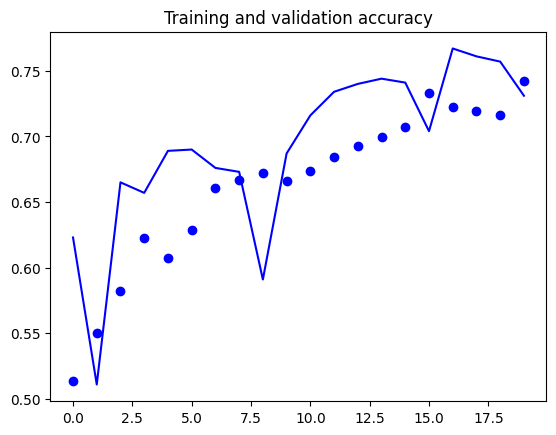

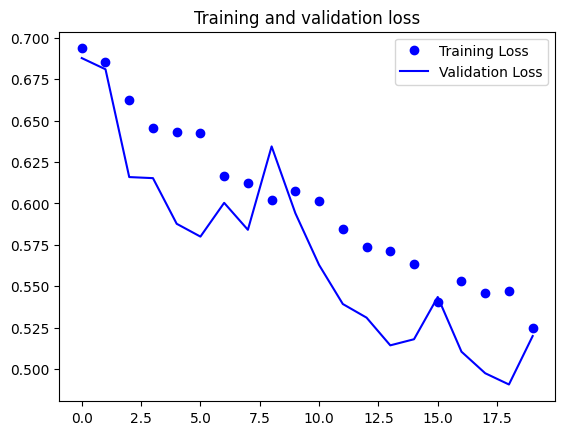

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()